https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol

In [ ]:
!pip install pandasql


In [ ]:
import pandasql as ps

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cartoes = pd.read_csv("/content/drive/MyDrive/brasileirao_dados/campeonato-brasileiro-cartoes.csv")

In [ ]:

estatistica = pd.read_csv("/content/drive/MyDrive/brasileirao_dados/campeonato-brasileiro-estatisticas-full.csv")
full = pd.read_csv("/content/drive/MyDrive/brasileirao_dados/campeonato-brasileiro-full.csv")
gols = pd.read_csv("/content/drive/MyDrive/brasileirao_dados/campeonato-brasileiro-gols.csv")

In [ ]:
full.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [ ]:
cartoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18857 entries, 0 to 18856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   partida_id  18857 non-null  int64  
 1   rodata      18857 non-null  int64  
 2   clube       18857 non-null  object 
 3   cartao      18857 non-null  object 
 4   atleta      18851 non-null  object 
 5   num_camisa  18471 non-null  float64
 6   posicao     17659 non-null  object 
 7   minuto      18857 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [ ]:
cartoes.head()

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66
1,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44
2,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72
3,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86
4,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10


In [ ]:
cartoes["amarelo"] = cartoes["cartao"].apply(lambda x: 1 if x == "Amarelo" else 0)
cartoes["vermelho"]= cartoes["cartao"].apply(lambda x: 1 if x == "Vermelho" else 0)

In [ ]:
cartoes["amarelo"].value_counts()

,count
amarelo,
1,17899
0,958


In [ ]:
cartoes["vermelho"].value_counts()

,count
vermelho,
0,17899
1,958


In [ ]:
cartoes.tail()

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,amarelo,vermelho
18852,8405,38,Vasco,Amarelo,Gabriel Pec,11.0,Atacante,90+5,1,0
18853,8405,38,Vasco,Amarelo,Paulinho,18.0,Meio-campo,51,1,0
18854,8405,38,Vasco,Amarelo,Gary Medel,17.0,Zagueiro,84,1,0
18855,8405,38,Bragantino,Amarelo,Eduardo Sasha,19.0,Atacante,17,1,0
18856,8405,38,Bragantino,Vermelho,Léo Realpe,2.0,Zagueiro,75,0,1


In [ ]:
full ["data"]=pd.to_datetime(full["data"], format="%d/%m/%Y")

In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  8405 non-null   int64         
 1   rodata              8405 non-null   int64         
 2   data                8405 non-null   datetime64[ns]
 3   hora                8405 non-null   object        
 4   mandante            8405 non-null   object        
 5   visitante           8405 non-null   object        
 6   formacao_mandante   3431 non-null   object        
 7   formacao_visitante  3431 non-null   object        
 8   tecnico_mandante    3795 non-null   object        
 9   tecnico_visitante   3795 non-null   object        
 10  vencedor            8405 non-null   object        
 11  arena               8405 non-null   object        
 12  mandante_Placar     8405 non-null   int64         
 13  visitante_Placar    8405 non-null   int64       

In [ ]:
full.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,2003-03-29,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,2003-03-29,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,2003-03-30,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,2003-03-30,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,2003-03-30,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [ ]:
print(cartoes.columns)

Index(['partida_id', 'rodata', 'clube', 'cartao', 'atleta', 'num_camisa',
       'posicao', 'minuto', 'amarelo', 'vermelho'],
      dtype='object')


In [ ]:
print(full.columns)

Index(['ID', 'rodata', 'data', 'hora', 'mandante', 'visitante',
       'formacao_mandante', 'formacao_visitante', 'tecnico_mandante',
       'tecnico_visitante', 'vencedor', 'arena', 'mandante_Placar',
       'visitante_Placar', 'mandante_Estado', 'visitante_Estado'],
      dtype='object')


In [ ]:
query = """
SELECT
  c.partida_id,
  c.rodata,
  c.clube,
  c.cartao,
  c.atleta,
  c.num_camisa,
  c.posicao,
  c.minuto,
  amarelo,
  vermelho,
  f.data,
  f.mandante,
  f.visitante
  FROM cartoes c LEFT JOIN full f ON c.partida_id = f.Id
  """


In [ ]:
df_cartoes = ps.sqldf(query, locals())

In [ ]:
df_cartoes.head()

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,amarelo,vermelho,data,mandante,visitante
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,None,66,1,0,2014-04-19 00:00:00.000000,Fluminense,Figueirense
1,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44,1,0,2014-04-19 00:00:00.000000,Fluminense,Figueirense
2,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72,1,0,2014-04-19 00:00:00.000000,Internacional,Vitoria
3,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,None,86,1,0,2014-04-19 00:00:00.000000,Internacional,Vitoria
4,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10,1,0,2014-04-19 00:00:00.000000,Internacional,Vitoria


In [ ]:
df_cartoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18857 entries, 0 to 18856
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   partida_id  18857 non-null  int64  
 1   rodata      18857 non-null  int64  
 2   clube       18857 non-null  object 
 3   cartao      18857 non-null  object 
 4   atleta      18851 non-null  object 
 5   num_camisa  18471 non-null  float64
 6   posicao     17659 non-null  object 
 7   minuto      18857 non-null  object 
 8   amarelo     18857 non-null  int64  
 9   vermelho    18857 non-null  int64  
 10  data        18857 non-null  object 
 11  mandante    18857 non-null  object 
 12  visitante   18857 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.9+ MB


In [ ]:
df_cartoes["data"] = pd.to_datetime(df_cartoes["data"], dayfirst=True)

<ipython-input-22-dd1324d36b52>:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S.%f format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_cartoes["data"] = pd.to_datetime(df_cartoes["data"], dayfirst=True)


In [ ]:
query2 = """
SELECT *
FROM df_cartoes
WHERE data >= '2023-01-01'
ORDER BY data
"""
df_cartoes_2023 = ps.sqldf(query2, locals())

In [ ]:
df_cartoes_2023.drop_duplicates()

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,amarelo,vermelho,data,mandante,visitante
0,8026,1,Cuiaba,Vermelho,Filipe Augusto Carvalho Souza,5.0,Meio-campo,57,0,1,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba
1,8026,1,Palmeiras,Amarelo,José Manuel Alberto López,18.0,Meio-campo,37,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba
2,8026,1,Cuiaba,Amarelo,Mateusinho,98.0,Zagueiro,48,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba
3,8026,1,Cuiaba,Amarelo,Deyverson,16.0,Atacante,6,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba
4,8026,1,Palmeiras,Amarelo,Jhonatan dos Santos Rosa,40.0,Meio-campo,66,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,8405,38,Vasco,Amarelo,Gabriel Pec,11.0,Atacante,90+5,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino
2114,8405,38,Vasco,Amarelo,Paulinho,18.0,Meio-campo,51,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino
2115,8405,38,Vasco,Amarelo,Gary Medel,17.0,Zagueiro,84,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino
2116,8405,38,Bragantino,Amarelo,Eduardo Sasha,19.0,Atacante,17,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino


In [ ]:
df_cartoes_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   partida_id  2118 non-null   int64  
 1   rodata      2118 non-null   int64  
 2   clube       2118 non-null   object 
 3   cartao      2118 non-null   object 
 4   atleta      2118 non-null   object 
 5   num_camisa  2118 non-null   float64
 6   posicao     2118 non-null   object 
 7   minuto      2118 non-null   object 
 8   amarelo     2118 non-null   int64  
 9   vermelho    2118 non-null   int64  
 10  data        2118 non-null   object 
 11  mandante    2118 non-null   object 
 12  visitante   2118 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 215.2+ KB


In [ ]:
df_cartoes_2023.head()

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,amarelo,vermelho,data,mandante,visitante
0,8026,1,Cuiaba,Vermelho,Filipe Augusto Carvalho Souza,5.0,Meio-campo,57,0,1,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba
1,8026,1,Palmeiras,Amarelo,José Manuel Alberto López,18.0,Meio-campo,37,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba
2,8026,1,Cuiaba,Amarelo,Mateusinho,98.0,Zagueiro,48,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba
3,8026,1,Cuiaba,Amarelo,Deyverson,16.0,Atacante,6,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba
4,8026,1,Palmeiras,Amarelo,Jhonatan dos Santos Rosa,40.0,Meio-campo,66,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba


In [ ]:
minutos_cartoes = df_cartoes_2023['minuto'].value_counts().reset_index()
minutos_cartoes

,minuto,count
0,90+5,48
1,90+4,47
2,90+3,38
3,89,37
4,90+1,36
...,...,...
108,1,2
109,45+7,2
110,45+9,1
111,90+13,1


In [ ]:
df_cartoes_2023[["minuto_regular", "acressimos"]] = df_cartoes_2023["minuto"].str.split("+", expand=True)
df_cartoes_2023

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,amarelo,vermelho,data,mandante,visitante,minuto_regular,acressimos
0,8026,1,Cuiaba,Vermelho,Filipe Augusto Carvalho Souza,5.0,Meio-campo,57,0,1,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,57,None
1,8026,1,Palmeiras,Amarelo,José Manuel Alberto López,18.0,Meio-campo,37,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,37,None
2,8026,1,Cuiaba,Amarelo,Mateusinho,98.0,Zagueiro,48,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,48,None
3,8026,1,Cuiaba,Amarelo,Deyverson,16.0,Atacante,6,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,6,None
4,8026,1,Palmeiras,Amarelo,Jhonatan dos Santos Rosa,40.0,Meio-campo,66,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,66,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,8405,38,Vasco,Amarelo,Gabriel Pec,11.0,Atacante,90+5,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino,90,5
2114,8405,38,Vasco,Amarelo,Paulinho,18.0,Meio-campo,51,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino,51,None
2115,8405,38,Vasco,Amarelo,Gary Medel,17.0,Zagueiro,84,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino,84,None
2116,8405,38,Bragantino,Amarelo,Eduardo Sasha,19.0,Atacante,17,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino,17,None


In [ ]:
df_cartoes_2023["acressimos"]  = df_cartoes_2023["acressimos"].fillna(0)

In [ ]:
df_cartoes_2023["minuto_regular"] = df_cartoes_2023["minuto_regular"].astype("int")

In [ ]:
df_cartoes_2023["acressimos"]  = df_cartoes_2023["acressimos"].astype("int")


In [ ]:
df_cartoes_2023["soma_minutos"] = df_cartoes_2023["minuto_regular"] + df_cartoes_2023["acressimos"]

In [ ]:
df_cartoes_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   partida_id      2118 non-null   int64  
 1   rodata          2118 non-null   int64  
 2   clube           2118 non-null   object 
 3   cartao          2118 non-null   object 
 4   atleta          2118 non-null   object 
 5   num_camisa      2118 non-null   float64
 6   posicao         2118 non-null   object 
 7   minuto          2118 non-null   object 
 8   amarelo         2118 non-null   int64  
 9   vermelho        2118 non-null   int64  
 10  data            2118 non-null   object 
 11  mandante        2118 non-null   object 
 12  visitante       2118 non-null   object 
 13  minuto_regular  2118 non-null   int64  
 14  acressimos      2118 non-null   int64  
 15  soma_minutos    2118 non-null   int64  
dtypes: float64(1), int64(7), object(8)
memory usage: 264.9+ KB


In [ ]:

def categorizar_minutos(minuto):
    # Verificar se há um "+" indicando acréscimos
    if '45+' in minuto:
        return '45+'
    elif '90+' in minuto:
        return "90+"

    # Tentar converter o valor base para inteiro
    try:
        minuto_int = int(minuto)
        if minuto_int > 90:
            return '90+'
        elif 0 <= minuto_int < 15:
            return '0-14'
        elif 15 <= minuto_int < 30:
            return '15-30'
        elif 30 <= minuto_int < 45:
            return '30-45'
        elif 45 <= minuto_int < 60:
            return '45-60'
        elif 60 <= minuto_int < 75:
            return '60-75'
        elif 75 <= minuto_int <= 90:
            return '75-90'
    except ValueError:
        return None

# Aplicar a função na coluna 'minutos' sem convertê-la
df_cartoes_2023['label'] = df_cartoes_2023['minuto'].apply(categorizar_minutos)



In [ ]:
df_cartoes_2023.tail(20)

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,amarelo,vermelho,data,mandante,visitante,minuto_regular,acressimos,soma_minutos,label
2098,8402,38,Cuiaba,Amarelo,Jonathan Cafú,7.0,Atacante,70,1,0,2023-12-06 00:00:00.000000,Cuiaba,Athletico-PR,70,0,70,60-75
2099,8402,38,Cuiaba,Amarelo,Fernando Sobral,88.0,Meio-campo,52,1,0,2023-12-06 00:00:00.000000,Cuiaba,Athletico-PR,52,0,52,45-60
2100,8402,38,Athletico-PR,Amarelo,Tomás Cuello,28.0,Meio-campo,90+1,1,0,2023-12-06 00:00:00.000000,Cuiaba,Athletico-PR,90,1,91,90+
2101,8402,38,Cuiaba,Vermelho,Clayson,29.0,Meio-campo,90+8,0,1,2023-12-06 00:00:00.000000,Cuiaba,Athletico-PR,90,8,98,90+
2102,8402,38,Cuiaba,Amarelo,Clayson,29.0,Meio-campo,69,1,0,2023-12-06 00:00:00.000000,Cuiaba,Athletico-PR,69,0,69,60-75
2103,8402,38,Athletico-PR,Amarelo,Lucas Belezi Barbosa,45.0,Zagueiro,90+5,1,0,2023-12-06 00:00:00.000000,Cuiaba,Athletico-PR,90,5,95,90+
2104,8402,38,Athletico-PR,Amarelo,Madson,22.0,Meio-campo,45+6,1,0,2023-12-06 00:00:00.000000,Cuiaba,Athletico-PR,45,6,51,45+
2105,8403,38,Santos,Amarelo,Gabriel Inocêncio,12.0,Meio-campo,52,1,0,2023-12-06 00:00:00.000000,Santos,Fortaleza,52,0,52,45-60
2106,8403,38,Fortaleza,Amarelo,Yago Pikachu,22.0,Meio-campo,40,1,0,2023-12-06 00:00:00.000000,Santos,Fortaleza,40,0,40,30-45
2107,8403,38,Fortaleza,Amarelo,Tomás Pochettino,7.0,Meio-campo,26,1,0,2023-12-06 00:00:00.000000,Santos,Fortaleza,26,0,26,15-30


In [ ]:
total_times  = df_cartoes_2023["clube"].value_counts()
total_times

,count
clube,
Fluminense,126
Coritiba,125
Atletico-MG,118
Internacional,115
Bragantino,114
Athletico-PR,112
Santos,110
Goias,110
Vasco,108


In [ ]:
df_cartoes_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   partida_id      2118 non-null   int64  
 1   rodata          2118 non-null   int64  
 2   clube           2118 non-null   object 
 3   cartao          2118 non-null   object 
 4   atleta          2118 non-null   object 
 5   num_camisa      2118 non-null   float64
 6   posicao         2118 non-null   object 
 7   minuto          2118 non-null   object 
 8   amarelo         2118 non-null   int64  
 9   vermelho        2118 non-null   int64  
 10  data            2118 non-null   object 
 11  mandante        2118 non-null   object 
 12  visitante       2118 non-null   object 
 13  minuto_regular  2118 non-null   int64  
 14  acressimos      2118 non-null   int64  
 15  soma_minutos    2118 non-null   int64  
 16  label           2118 non-null   object 
dtypes: float64(1), int64(7), object(9

In [ ]:
total_rodada =  max(df_cartoes_2023['rodata'])
total_rodada


38

In [ ]:
total_jogos = total_rodada*10
total_jogos

380

# Distribuições.

Distribuição de cartoes por time.

Top 10 jogadores, distribuição por posição.

Tempo em que mais se toma cartão

# Tempo

Fazer comparações com o tempo

In [ ]:
total_amarelo = df_cartoes_2023["amarelo"].sum()
total_amarelo

2010

In [ ]:
total_vermelho = df_cartoes_2023["vermelho"].sum()
total_vermelho

108

In [ ]:
media_amarelo_jogo = total_amarelo/total_jogos
media_amarelo_jogo

5.2894736842105265

In [ ]:
media_vermelho_jogo = total_vermelho/total_jogos
media_vermelho_jogo

0.28421052631578947

In [ ]:
media_amarelo_rodada = total_amarelo/total_rodada
media_amarelo_rodada

52.89473684210526

In [ ]:
media_vermelho_rodada = total_vermelho/total_rodada
media_vermelho_rodada

2.8421052631578947

#Compreendendo melhor os cartões Amarelos de 2023

Sabemos que o total de cartões amarelos aplicados em 2023 foi de 2010 em 380 jogos dando um média de 5 cartões por jogo e 52 cartões por rodada

In [ ]:
cartoes_amarelos = df_cartoes_2023.loc[df_cartoes_2023["amarelo"]==1] # Dataset somente com os cartoes amarelos
cartoes_amarelos

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,amarelo,vermelho,data,mandante,visitante,minuto_regular,acressimos,soma_minutos,label
1,8026,1,Palmeiras,Amarelo,José Manuel Alberto López,18.0,Meio-campo,37,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,37,0,37,30-45
2,8026,1,Cuiaba,Amarelo,Mateusinho,98.0,Zagueiro,48,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,48,0,48,45-60
3,8026,1,Cuiaba,Amarelo,Deyverson,16.0,Atacante,6,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,6,0,6,0-14
4,8026,1,Palmeiras,Amarelo,Jhonatan dos Santos Rosa,40.0,Meio-campo,66,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,66,0,66,60-75
5,8026,1,Cuiaba,Amarelo,Filipe Augusto Carvalho Souza,5.0,Meio-campo,52,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,52,0,52,45-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,8404,38,Flamengo,Amarelo,Pablo Castro,30.0,Zagueiro,15,1,0,2023-12-06 00:00:00.000000,Sao Paulo,Flamengo,15,0,15,15-30
2113,8405,38,Vasco,Amarelo,Gabriel Pec,11.0,Atacante,90+5,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino,90,5,95,90+
2114,8405,38,Vasco,Amarelo,Paulinho,18.0,Meio-campo,51,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino,51,0,51,45-60
2115,8405,38,Vasco,Amarelo,Gary Medel,17.0,Zagueiro,84,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino,84,0,84,75-90


In [ ]:
clube_total_amarelo = cartoes_amarelos[["clube"]].value_counts().reset_index()
# Coritiba, fluminense e atletico-mg lideram o top 3 time com mais cartões amarelos

In [ ]:
clube_total_amarelo.head()

,clube,count
0,Coritiba,120
1,Fluminense,117
2,Atletico-MG,112
3,Internacional,109
4,Bragantino,108


Text(0.5, 0, 'Clubes')

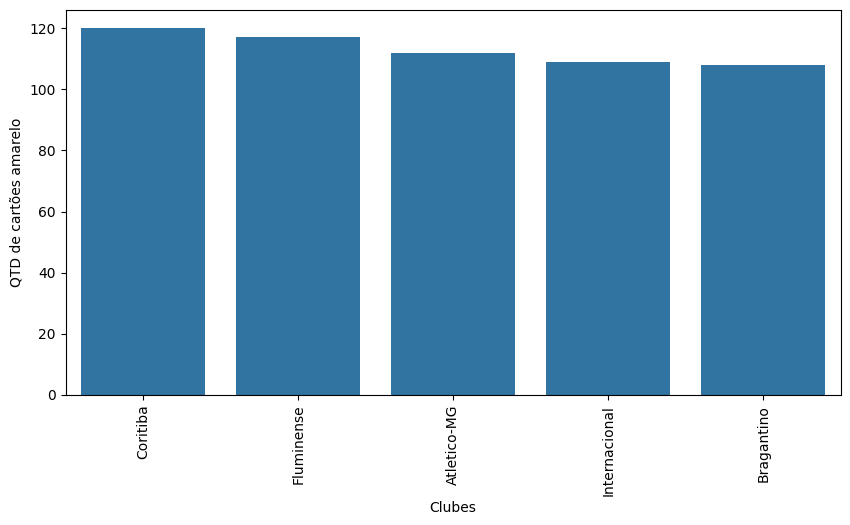

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(data=clube_total_amarelo.head(5), x="clube", y="count")
plt.ylabel("QTD de cartões amarelo")
plt.xlabel("Clubes")

In [ ]:
jogadores = cartoes_amarelos[["atleta", "clube"]].value_counts().reset_index()
jogadores.head(20)

,atleta,clube,count
0,Walter Kannemann,Gremio,16
1,Robson Fernandes,Coritiba,13
2,Rodrigo Fernández,Santos,12
3,Juninho Capixaba,Bragantino,12
4,Gabriel Mercado,Internacional,12
5,André,Fluminense,11
6,Cristian Chagas Tarouco,Fortaleza,11
7,Mauricio Lemos,Atletico-MG,11
8,Raniele,Cuiaba,10
9,Reinaldo Manoel da Silva,Gremio,10


In [ ]:
2010/20

100.5

Text(0.5, 0, 'Atleta')

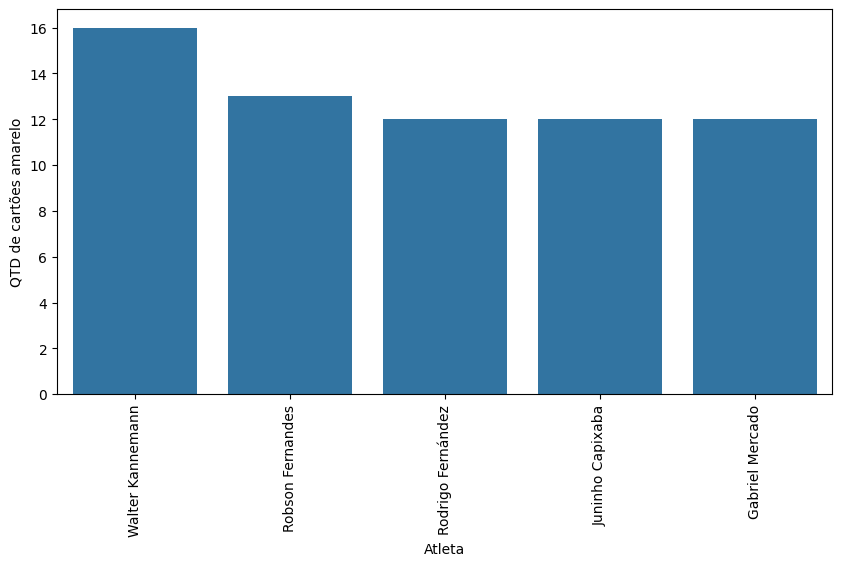

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(data=jogadores.head(5), x="atleta", y="count")
plt.ylabel("QTD de cartões amarelo")
plt.xlabel("Atleta")

In [ ]:
cartoes_posicao = cartoes_amarelos["posicao"].value_counts().reset_index()


Text(0.5, 0, 'Posição')

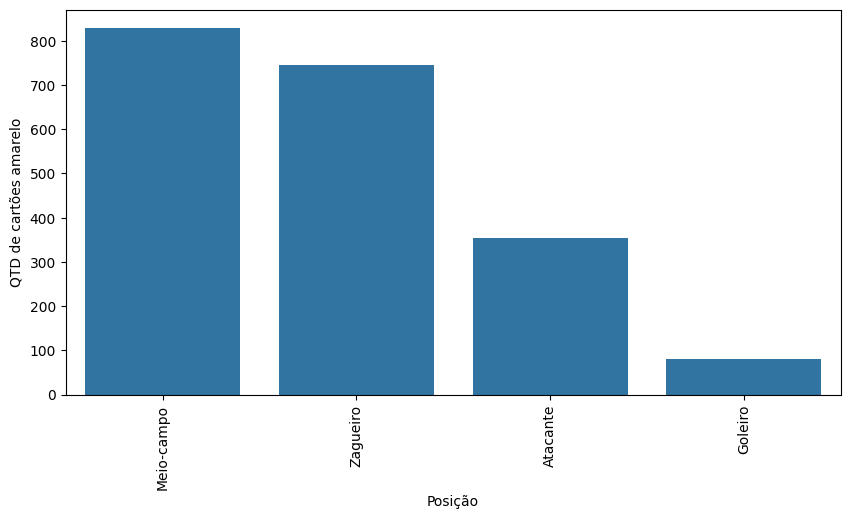

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(data=cartoes_posicao, x="posicao", y="count")
plt.ylabel("QTD de cartões amarelo")
plt.xlabel("Posição")

In [ ]:
cartoes_posicao["count"].sum()

2010

In [ ]:
cartoes_posicao.head()

,posicao,count
0,Meio-campo,829
1,Zagueiro,746
2,Atacante,354
3,Goleiro,81


In [ ]:
cartao_posicao = cartoes_amarelos[["posicao", "clube"]].value_counts().reset_index()
cartao_posicao.head()

,posicao,clube,count
0,Meio-campo,Santos,57
1,Meio-campo,Athletico-PR,54
2,Meio-campo,Coritiba,53
3,Meio-campo,Fluminense,49
4,Zagueiro,Gremio,49


qtd de amarelo por tempo, qual tempo toma mais cartão tempo x clube

In [ ]:
tempo = cartoes_amarelos[["label"]].value_counts().reset_index()
tempo


,label,count
0,75-90,426
1,60-75,316
2,30-45,305
3,90+,292
4,45-60,256
5,15-30,215
6,45+,121
7,0-14,79


In [ ]:
coritiba_df = cartoes_amarelos.loc[df_cartoes_2023["clube"]=='Coritiba']

In [ ]:
coritiba_df.head()

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,amarelo,vermelho,data,mandante,visitante,minuto_regular,acressimos,soma_minutos,label
42,8034,1,Coritiba,Amarelo,William Pottker,90.0,Atacante,31,1,0,2023-04-16 00:00:00.000000,Flamengo,Coritiba,31,0,31,30-45
44,8034,1,Coritiba,Amarelo,Zé Roberto,18.0,Atacante,90+4,1,0,2023-04-16 00:00:00.000000,Flamengo,Coritiba,90,4,94,90+
45,8034,1,Coritiba,Amarelo,Júnior Urso,23.0,Meio-campo,23,1,0,2023-04-16 00:00:00.000000,Flamengo,Coritiba,23,0,23,15-30
104,8043,2,Coritiba,Amarelo,Alef Manga,11.0,Atacante,68,1,0,2023-04-23 00:00:00.000000,Coritiba,Fortaleza,68,0,68,60-75
117,8047,3,Coritiba,Amarelo,Kaio César Andrade Lima,37.0,Atacante,71,1,0,2023-04-29 00:00:00.000000,Coritiba,Sao Paulo,71,0,71,60-75


In [ ]:
tempo_coritiba = coritiba_df[["label"]].value_counts().reset_index()
tempo_coritiba

,label,count
0,60-75,26
1,30-45,22
2,45-60,18
3,75-90,18
4,15-30,14
5,90+,12
6,45+,6
7,0-14,4


In [ ]:
posicao_coritiba = coritiba_df['posicao'].value_counts().reset_index()
posicao_coritiba

,posicao,count
0,Meio-campo,53
1,Zagueiro,45
2,Atacante,17
3,Goleiro,5


In [ ]:
posicao_tempo = cartoes_amarelos.loc[:,['posicao', 'label']]

In [ ]:
tempo2 = posicao_tempo.value_counts().reset_index()

In [ ]:
tempo2.head()

,posicao,label,count
0,Meio-campo,75-90,152
1,Meio-campo,30-45,147
2,Meio-campo,60-75,142
3,Zagueiro,75-90,141
4,Zagueiro,60-75,116


In [ ]:
df = tempo2.pivot(index="posicao",columns="label", values="count")
df

label,0-14,15-30,30-45,45+,45-60,60-75,75-90,90+
posicao,,,,,,,,
Atacante,15,24,44,15,40,51,100,65
Goleiro,1,7,2,3,12,7,33,16
Meio-campo,29,79,147,64,111,142,152,105
Zagueiro,34,105,112,39,93,116,141,106


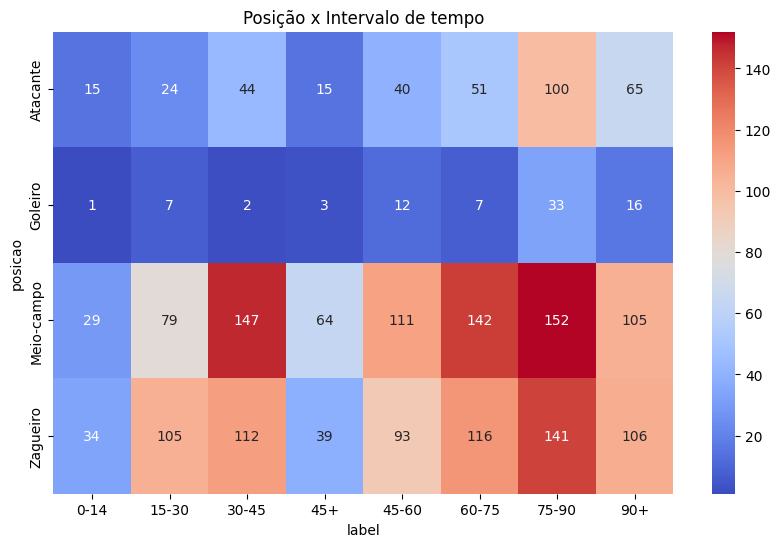

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, fmt="d", cmap='coolwarm')
plt.title('Posição x Intervalo de tempo')
plt.show()

In [ ]:
clube_tempo = cartoes_amarelos.loc[:,['clube', 'label']]
tempo_clube = clube_tempo.value_counts().reset_index()
df2 = tempo_clube.pivot(index="clube",columns="label", values="count")

In [ ]:
tempo_clube.head()

,clube,label,count
0,Vasco,75-90,28
1,Bragantino,75-90,27
2,Gremio,75-90,26
3,Cruzeiro,75-90,26
4,Coritiba,60-75,26


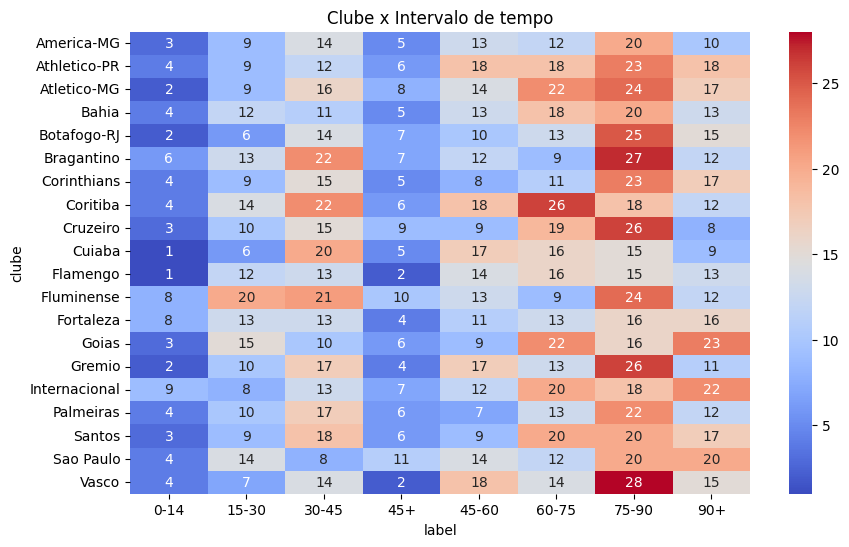

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2, annot=True, fmt="d", cmap='coolwarm')
plt.title('Clube x Intervalo de tempo')
plt.show()

In [ ]:
cartoes_vermelho = df_cartoes_2023.loc[df_cartoes_2023["cartao"]=='Vermelho']
cartoes_vermelho.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 2117
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   partida_id      108 non-null    int64  
 1   rodata          108 non-null    int64  
 2   clube           108 non-null    object 
 3   cartao          108 non-null    object 
 4   atleta          108 non-null    object 
 5   num_camisa      108 non-null    float64
 6   posicao         108 non-null    object 
 7   minuto          108 non-null    object 
 8   amarelo         108 non-null    int64  
 9   vermelho        108 non-null    int64  
 10  data            108 non-null    object 
 11  mandante        108 non-null    object 
 12  visitante       108 non-null    object 
 13  minuto_regular  108 non-null    int64  
 14  acressimos      108 non-null    int64  
 15  soma_minutos    108 non-null    int64  
 16  label           108 non-null    object 
dtypes: float64(1), int64(7), object(9)
memo

In [ ]:
cartoes_vermelho.head()

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,amarelo,vermelho,data,mandante,visitante,minuto_regular,acressimos,soma_minutos,label
0,8026,1,Cuiaba,Vermelho,Filipe Augusto Carvalho Souza,5.0,Meio-campo,57,0,1,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,57,0,57,45-60
55,8035,1,Santos,Vermelho,Yeferson Soteldo,10.0,Meio-campo,87,0,1,2023-04-16 00:00:00.000000,Gremio,Santos,87,0,87,75-90
83,8039,2,Cruzeiro,Vermelho,Oliveira,6.0,Zagueiro,90+8,0,1,2023-04-22 00:00:00.000000,Cruzeiro,Gremio,90,8,98,90+
138,8049,3,Santos,Vermelho,Eduardo,4.0,Zagueiro,90+3,0,1,2023-04-29 00:00:00.000000,Santos,America-MG,90,3,93,90+
143,8050,3,Bragantino,Vermelho,Cleiton Schwengber,1.0,Goleiro,79,0,1,2023-04-29 00:00:00.000000,Bragantino,Cruzeiro,79,0,79,75-90


In [ ]:
cartoes_vermelho["clube"].value_counts().reset_index()

,clube,count
0,America-MG,11
1,Fluminense,9
2,Santos,8
3,Vasco,6
4,Atletico-MG,6
5,Bahia,6
6,Internacional,6
7,Goias,6
8,Bragantino,6
9,Botafogo-RJ,5


In [ ]:
cartoes_vermelho["posicao"].value_counts().reset_index()

,posicao,count
0,Zagueiro,53
1,Meio-campo,33
2,Atacante,18
3,Goleiro,4


In [ ]:
cartoes_vermelho["label"].value_counts().reset_index()

,label,count
0,90+,37
1,75-90,24
2,60-75,21
3,45-60,10
4,30-45,7
5,15-30,5
6,45+,2
7,0-14,2


In [ ]:
clube_vermelho = cartoes_vermelho.loc[:,["clube", "label"]]
vermelho_tempo_clube = clube_vermelho.value_counts().reset_index()
dados_vermelho_clube = vermelho_tempo_clube.pivot(index="clube",columns="label", values="count")
dados_vermelho_clube.fillna(0, inplace=True)

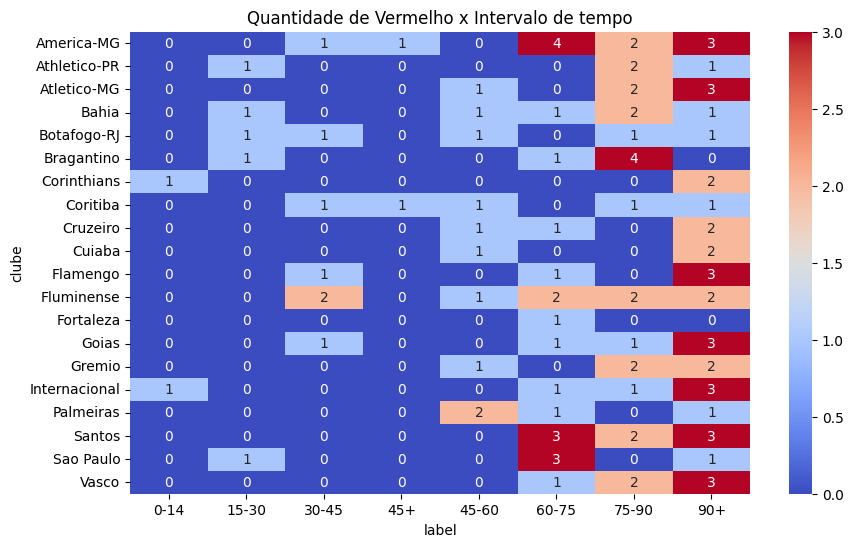

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(dados_vermelho_clube, annot=True, cmap='coolwarm', robust=True)
plt.title('Quantidade de Vermelho x Intervalo de tempo')
plt.show()

In [ ]:
posicao_vermelho = cartoes_vermelho.loc[:,["posicao", "label"]]
vermelho_tempo_posicao = posicao_vermelho.value_counts().reset_index()
dados_vermelho_posicao = vermelho_tempo_posicao.pivot(index="posicao",columns="label", values="count")
dados_vermelho_posicao.fillna(0, inplace=True)

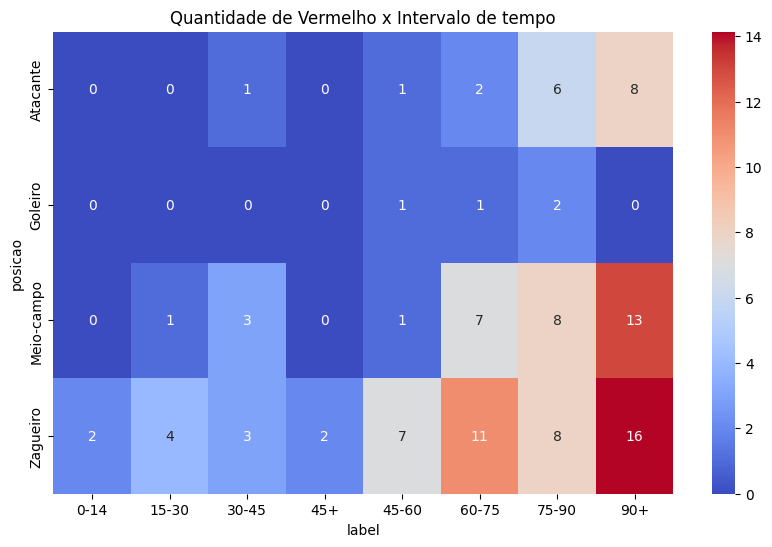

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(dados_vermelho_posicao, annot=True, cmap='coolwarm', robust=True)
plt.title('Quantidade de Vermelho x Intervalo de tempo')
plt.show()

In [ ]:
gols.head()

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
0,4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra
1,4607,1,Fluminense,Fred,45,Penalty
2,4607,1,Fluminense,Rafael Sóbis,31,NaN
3,4608,1,Internacional,Charles Aránguiz,6,NaN
4,4612,1,Cruzeiro,Nílton Ferreira Júnior,63,NaN


In [ ]:
full.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,2003-03-29,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,2003-03-29,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,2003-03-30,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,2003-03-30,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,2003-03-30,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [ ]:
df_cartoes_2023.head()

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,amarelo,vermelho,data,mandante,visitante,minuto_regular,acressimos,soma_minutos,label
0,8026,1,Cuiaba,Vermelho,Filipe Augusto Carvalho Souza,5.0,Meio-campo,57,0,1,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,57,0,57,45-60
1,8026,1,Palmeiras,Amarelo,José Manuel Alberto López,18.0,Meio-campo,37,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,37,0,37,30-45
2,8026,1,Cuiaba,Amarelo,Mateusinho,98.0,Zagueiro,48,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,48,0,48,45-60
3,8026,1,Cuiaba,Amarelo,Deyverson,16.0,Atacante,6,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,6,0,6,0-14
4,8026,1,Palmeiras,Amarelo,Jhonatan dos Santos Rosa,40.0,Meio-campo,66,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,66,0,66,60-75


In [ ]:
mandante = cartoes_amarelos.loc[cartoes_amarelos['mandante'] == cartoes_amarelos['clube'], ['clube','visitante']]

In [ ]:
mandante.head()

,clube,visitante
1,Palmeiras,Cuiaba
4,Palmeiras,Cuiaba
7,America-MG,Fluminense
9,America-MG,Fluminense
10,America-MG,Fluminense


In [ ]:
mandante_total = mandante["clube"].value_counts().reset_index()

In [ ]:
mandante_total.head()

,clube,count
0,Fluminense,69
1,Internacional,59
2,Goias,56
3,Santos,55
4,Vasco,54


In [ ]:
visitante = cartoes_amarelos.loc[cartoes_amarelos['visitante'] == cartoes_amarelos['clube'], ['clube','mandante']]
total_visitante = visitante.value_counts().reset_index()

In [ ]:
visitante_total = visitante["clube"].value_counts().reset_index()

In [ ]:
query = """
SELECT
  m.clube as clube_mandante,
  m.count as amarelo_mandante,
  v.count as amarelo_visitante,
  (m.count - v.count) AS diferenca
  FROM mandante_total m left join visitante_total v ON m.clube = v.clube
  """


In [ ]:
df_visitante_mandante = ps.sqldf(query, locals())

In [ ]:
df_visitante_mandante.head(20)

,clube_mandante,amarelo_mandante,amarelo_visitante,diferenca
0,Fluminense,69,48,21
1,Internacional,59,50,9
2,Goias,56,48,8
3,Santos,55,47,8
4,Vasco,54,48,6
5,Bahia,53,43,10
6,Bragantino,52,56,-4
7,Atletico-MG,50,62,-12
8,Gremio,49,51,-2
9,Cruzeiro,49,50,-1


In [ ]:
df.head()

label,0-14,15-30,30-45,45+,45-60,60-75,75-90,90+
posicao,,,,,,,,
Atacante,15,24,44,15,40,51,100,65
Goleiro,1,7,2,3,12,7,33,16
Meio-campo,29,79,147,64,111,142,152,105
Zagueiro,34,105,112,39,93,116,141,106


In [ ]:
df_cartoes_2023.to_csv('df_cartoes_2023.csv', index=False, encoding='utf-8')

In [ ]:
from google.colab import files
files.download("df_cartoes_2023.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cartoes_2023

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,amarelo,vermelho,data,mandante,visitante,minuto_regular,acressimos,soma_minutos,label
0,8026,1,Cuiaba,Vermelho,Filipe Augusto Carvalho Souza,5.0,Meio-campo,57,0,1,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,57,0,57,45-60
1,8026,1,Palmeiras,Amarelo,José Manuel Alberto López,18.0,Meio-campo,37,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,37,0,37,30-45
2,8026,1,Cuiaba,Amarelo,Mateusinho,98.0,Zagueiro,48,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,48,0,48,45-60
3,8026,1,Cuiaba,Amarelo,Deyverson,16.0,Atacante,6,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,6,0,6,0-14
4,8026,1,Palmeiras,Amarelo,Jhonatan dos Santos Rosa,40.0,Meio-campo,66,1,0,2023-04-15 00:00:00.000000,Palmeiras,Cuiaba,66,0,66,60-75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,8405,38,Vasco,Amarelo,Gabriel Pec,11.0,Atacante,90+5,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino,90,5,95,90+
2114,8405,38,Vasco,Amarelo,Paulinho,18.0,Meio-campo,51,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino,51,0,51,45-60
2115,8405,38,Vasco,Amarelo,Gary Medel,17.0,Zagueiro,84,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino,84,0,84,75-90
2116,8405,38,Bragantino,Amarelo,Eduardo Sasha,19.0,Atacante,17,1,0,2023-12-06 00:00:00.000000,Vasco,Bragantino,17,0,17,15-30
